In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

data = pd.read_csv ('/content/winequality-white.csv')

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality num,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,Bad
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,Bad
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,Bad
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Bad
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,Bad
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,Bad
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,Bad
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,Good


In [ ]:
classLabel="quality num"
data2 = data.drop(classLabel, axis = 1)

In [ ]:
ClassLabel="quality"
dataFeatures = data2.drop(ClassLabel,axis = 1).values

r=len(dataFeatures)
dataFeatures=dataFeatures[:r-1]

In [ ]:
dataPhenotypes = data[ClassLabel].values
dataPhenotypes= dataPhenotypes[:r-1]

In [ ]:
dataPhenotypes

array(['Bad', 'Bad', 'Bad', ..., 'Bad', 'Bad', 'Good'], dtype=object)

In [ ]:
dataFeatures_train, dataFeatures_test, dataPhenotypes_train, dataPhenotypes_test = train_test_split(dataFeatures, dataPhenotypes, stratify=dataPhenotypes, random_state=1)

In [ ]:
DataPhenotypes_train=LabelBinarizer().fit_transform(dataPhenotypes_train)
DataPhenotypes_test=LabelBinarizer().fit_transform(dataPhenotypes_test)  

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [ ]:
#Please see the following website for reference
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

import numpy as np


max_depth= [10,20,30,40,50]
max_depth.append(None)

min_samples_split = [2,3,4,5,6]

min_samples_leaf = [1,2,5]

max_features=[1,2,4,6,11]
max_features.append(None)




# Create the random grid
random_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}
print(random_grid)

{'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 3, 4, 5, 6], 'min_samples_leaf': [1, 2, 5], 'max_features': [1, 2, 4, 6, 11, None]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_random= RandomizedSearchCV(estimator=model,param_distributions= random_grid, n_iter=100, cv = 3, verbose=2, n_jobs=-1)

In [ ]:
model_random.fit(dataFeatures_train,dataPhenotypes_train)
model_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'max_depth': 30,
 'max_features': 11,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the random grid
param_grid = {
 'max_depth': [10,20,30,40,50,None],
 'min_samples_split': [2,3,4],
 'min_samples_leaf': [2],
 'max_features': [1,2,4,11,None]}
print(param_grid)

{'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [2], 'max_features': [1, 2, 4, 11, None]}


In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_grid= GridSearchCV(estimator=model,param_grid= param_grid, cv = 3, verbose=2, n_jobs=-1)

In [ ]:
model_grid.fit(dataFeatures_train,dataPhenotypes_train)
model_grid.best_params_

Fitting 3 folds for each of 90 candidates, totalling 270 fits


{'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=20,min_samples_split=3, min_samples_leaf=2, max_features=None)


TrainedModel=model.fit(dataFeatures_train,dataPhenotypes_train)

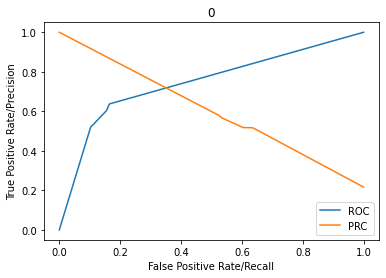

PRC AUC:0.6075271411639942
ROC AUC:0.7458294025157233


<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = TrainedModel.predict_proba(dataFeatures_test)
fpr1, tpr1, thresholds1 = roc_curve(DataPhenotypes_test, probs[:,1])
prec1, recall1, thresholds1 = precision_recall_curve(DataPhenotypes_test, probs[:,1])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('0')
plt.show()
plt.savefig("Vgg19CNNClass0.png")

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

In [ ]:
probs

array([[0.78933456, 0.21066544],
       [0.94290687, 0.05709313],
       [0.93223447, 0.06776553],
       ...,
       [0.89818655, 0.10181345],
       [0.76771004, 0.23228996],
       [0.94107418, 0.05892582]])

In [ ]:
DataPhenotypes_test[:,0]

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
DataPhenotypes_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
probs[:,0]

array([0.78933456, 0.94290687, 0.93223447, ..., 0.89818655, 0.76771004,
       0.94107418])